In [2]:
%load_ext autoreload
%reload_ext autoreload

import tensorflow as tf
from tensorflow.keras.optimizers.schedules import PolynomialDecay

import os
os.chdir("..")

from models.resnet import make_resnet18_UniformHe
from utils.train_utils import Model_Trainer, load_data, timer

import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import time

gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

print("Executed")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Executed


In [ ]:
%load_ext autoreload
%reload_ext autoreload

batch_size=128
n_epochs = 1000 
label_noise = 0 # Write 10% as 0.1

# load the Cifar 10 data set
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
image_shape = x_train[0].shape
"""
print(type(x_train[0]))
print(type(y_train))
print(type(y_test))
print(type(x_test))
"""

# apply label noise to the data set
random_idx = np.random.choice(x_train.shape[0], int(label_noise*x_train.shape[0]))
rand_labels = np.random.randint(low=y_train.min(), high=y_train.max(), size=len(random_idx))
y_train[random_idx] = np.expand_dims(rand_labels, axis=1)

# Range of resnet widths to train.
model_histories = {}
resnet_widths = [i for i in range(13,17)]+[20]+[i for i in range(48,57)]

"""
# Paths to save model weights and 
model_weights_paths = f'trained_model_weights/resnet18'
data_save_path = 'experimental_results/resnet18'
"""

!pwd
# Paths to save model weights and experimental results.
model_weights_paths = f"trained_model_weights_{data_set}/resnet18_{label_noise_as_int}pct_noise/"
data_save_path = (
    f"experimental_results_cifar10/resnet18_{label_noise}pct_noise" + ".pkl"
)

"""
class ModelTimer(tf.keras.callbacks.Callback):
    
    def on_train_begin(self,logs={}):
        self.epoch_times = []
        self.timestamps = []
        self.start_time = time.time()
        self.epoch_time_start = 0
        self.end_time = 0
        
    def on_train_end(self,logs={}):
        self.end_time = time.time() - self.start_time
        
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()
        
    def on_epoch_end(self, epoch, logs={}):
        self.epoch_times.append(time.time() - self.epoch_time_start)
        self.timestamps.append(time.time() - self.start_time)
"""

for width in resnet_widths:
    # Depth 7 Conv Net using default Kaiming Uniform Initialization.
    conv_net, model_id = make_resnet18_UniformHe(image_shape, k=width)

    conv_net.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    """
    model_timer = ModelTimer()
    # Print model_timer.epoch_times to see seconds each epoch takes
    # Print model_timer.timestamps to see cumulative times for epochs in seconds
    # Print model_timer.end_time to see total training time in seconds
    """
    model_timer = timer()
    
    #image_shape = tf.cast(image_shape, tf.float32)
    x_train = tf.convert_to_tensor(x_train,dtype=tf.float32)
    y_train = tf.convert_to_tensor(y_train,dtype=tf.float32)
    x_test = tf.convert_to_tensor(x_test,dtype=tf.float32)
    y_test = tf.convert_to_tensor(y_test,dtype=tf.float32)
    
    print(f'STARTING TRAINING: {model_id}')
    history = conv_net.fit(
        x=x_train, y=y_train, 
        validation_data=(x_test, y_test),
        epochs=n_epochs,
        batch_size=batch_size,
        verbose=0, 
        callbacks = [model_timer]
    )
    print(f'FINISHED TRAINING: {model_id}')    
    
    # add results to dictionary and store the resulting model weights.
    model_histories[model_id] = history.history
    
    history.model.save_weights(model_weights_paths + model_id)
    pkl.dump(model_histories, open(data_save_path, "wb"))
    
    
    # clear GPU of prior model to decrease training times.
    tf.keras.backend.clear_session()
    
"""    
# store all the results in a pickle file for later graphing and analysis.
depth_7_metrics = {} 

for m_id, history in model_histories.items():
    depth_7_metrics[m_id] = history.history
    
pkl.dump(depth_7_metrics, open(data_save_path + f'depth_{convnet_depth}.pkl', 'wb'))
"""

print("FINALLY!!!!!!!")

In [ ]:
print("Executed Checkpoint 1")
print(dir(time))
print(time.localtime())

In [ ]:
%load_ext autoreload
%reload_ext autoreload

###########################################
# Training for widths 13-16 for 1000 epochs
###########################################

import os
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import PolynomialDecay

!pwd
#os.chdir("..")

from models.resnet import make_resnet18_UniformHe
import utils
import importlib
importlib.reload(utils.train_utils)
import utils.train_utils as training_utils

import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import time
import pickle as pkl

gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#Assigned: 13-16, 20, 48-56
resnet_widths_rohin = [i for i in range(13,17)]+[20]+[i for i in range(48,57)]

metrics_fig1_rohin = list()
metrics_fig1_rohin = training_utils.train_resnet18("cifar10", resnet_widths_rohin, label_noise_as_int=0, n_epochs=1000, n_batch_steps=500_000, optimizer=None, save=True, data_save_path_prefix="", data_save_path_suffix="")

print(metrics_fig1_rohin)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/ecbm4040/DeepDoubleDescent_Tensorflow
STARTING TRAINING: ResNet18_width_13
Epoch: 0000, Total Run Time: 00:00:07 - Loss: 1.7467e+00, Accuracy: 0.356, Test Loss: 1.5051e+00, Test Accuracy: 0.450
Epoch: 0025, Total Run Time: 00:01:27 - Loss: 1.7868e-01, Accuracy: 0.949, Test Loss: 1.7481e+00, Test Accuracy: 0.595
Epoch: 0050, Total Run Time: 00:02:47 - Loss: 3.0835e-02, Accuracy: 0.991, Test Loss: 2.7836e+00, Test Accuracy: 0.589
Epoch: 0075, Total Run Time: 00:04:07 - Loss: 1.4560e-02, Accuracy: 0.996, Test Loss: 3.2064e+00, Test Accuracy: 0.588
Epoch: 0100, Total Run Time: 00:05:26 - Loss: 1.7371e-02, Accuracy: 0.994, Test Loss: 3.4025e+00, Test Accuracy: 0.590
Epoch: 0125, Total Run Time: 00:06:46 - Loss: 1.0434e-02, Accuracy: 0.997, Test Loss: 3.5228e+00, Test Accuracy: 0.593
Epoch: 0150, Total Run Time: 00:08:06 - Loss: 9.0806e-03, Accuracy: 0.997, Test Loss: 3.6607e+00, Test Accuracy: 0.58

Epoch: 0675, Total Run Time: 00:36:32 - Loss: 3.7767e-03, Accuracy: 0.999, Test Loss: 4.0989e+00, Test Accuracy: 0.633
Epoch: 0700, Total Run Time: 00:37:53 - Loss: 2.8020e-03, Accuracy: 0.999, Test Loss: 4.1351e+00, Test Accuracy: 0.634
Epoch: 0775, Total Run Time: 00:41:57 - Loss: 4.4806e-03, Accuracy: 0.998, Test Loss: 4.0756e+00, Test Accuracy: 0.647
Epoch: 0800, Total Run Time: 00:43:18 - Loss: 4.5830e-03, Accuracy: 0.998, Test Loss: 4.3284e+00, Test Accuracy: 0.635
Epoch: 0825, Total Run Time: 00:44:39 - Loss: 3.1764e-03, Accuracy: 0.999, Test Loss: 4.2279e+00, Test Accuracy: 0.644
Epoch: 0850, Total Run Time: 00:46:00 - Loss: 2.2827e-03, Accuracy: 0.999, Test Loss: 4.1418e+00, Test Accuracy: 0.642
Epoch: 0875, Total Run Time: 00:47:21 - Loss: 2.9141e-03, Accuracy: 0.999, Test Loss: 4.2310e+00, Test Accuracy: 0.640
Epoch: 0900, Total Run Time: 00:48:42 - Loss: 3.8482e-03, Accuracy: 0.999, Test Loss: 4.1475e+00, Test Accuracy: 0.643
Epoch: 0925, Total Run Time: 00:50:03 - Loss: 1.

/home/ecbm4040/DeepDoubleDescent_Tensorflow
Notebooks				experimental_results_cifar10
README.md				models
ResNet18_CIFAR10_Rohin_Checkpoint_1.db	trained_model_weights_cifar10
ResNets_CIFAR10.db			utils
ResNets_CIFAR10.ipynb
/home/ecbm4040/DeepDoubleDescent_Tensorflow


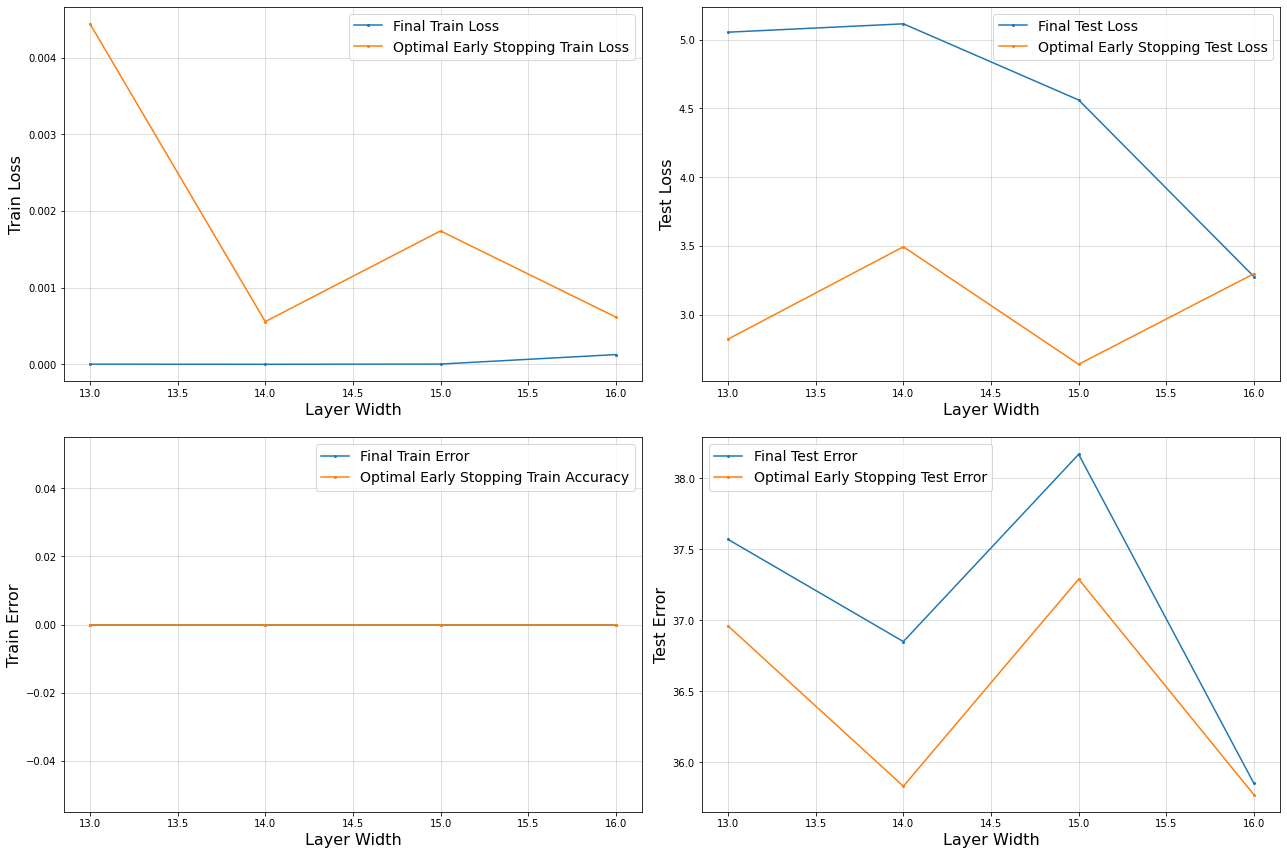

In [11]:
label_noise_as_int = 0
!pwd
!ls
import os
#os.chdir("DeepDoubleDescent_Tensorflow")
!pwd

from utils.visualizations import plot_loss_from_file

path = 'experimental_results_cifar10/resnet18_0pct_noise.pkl'
plot_loss_from_file(path)

In [8]:
import dill
dill.dump_session("ResNet18_CIFAR10_Rohin_Checkpoint_1.db")
print("Executed")

Executed
